In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from gnninterpreter import *
import torch

/home/du0/20CS30037/miniconda3/envs/gnn_inter/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# MUTAGENICITY DATASET

In [3]:
global_seed = 42
dataset = MutagenicityDataset(seed=global_seed)

Processing...
Done!


In [4]:
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=64,
                      num_layers=3)

model.load_state_dict(torch.load('ckpts/mutagen_hd_64_epochs_128.pt'))

<All keys matched successfully>

In [5]:
dataset.evaluate_model(model)

/home/du0/20CS30037/miniconda3/envs/gnn_inter/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


class idx: 0, class: mutagen, f1: 0.8795589208602905
class idx: 1, class: nonmutagen, f1: 0.8564931750297546


{'mutagen': 0.8795589208602905, 'nonmutagen': 0.8564931750297546}

In [6]:
mean_embeds = dataset.mean_embeddings(model)

In [7]:
trainer = {}
sampler = {}

# Mutagen Class (Class 0)

In [8]:
cls_idx = 0
trainer[cls_idx] = Trainer(
    sampler=(s := GraphSampler(
        max_nodes=20,
        num_node_cls=len(dataset.NODE_CLS),
        num_edge_cls=len(dataset.EDGE_CLS),
        seed=global_seed,
        temperature=0.15,
        learn_node_feat=True,
        learn_edge_feat=True,
    )),
    discriminator=model,
    criterion=WeightedCriterion([
        dict(key="logits", criterion=ClassScoreCriterion(class_idx=cls_idx, mode='maximize'), weight=5),
        dict(key="embeds", criterion=EmbeddingCriterion(target_embedding=mean_embeds[cls_idx]), weight=10),
        dict(key="logits", criterion=MeanPenalty(), weight=0),
        dict(key="omega", criterion=NormPenalty(order=1), weight=4),
        dict(key="omega", criterion=NormPenalty(order=2), weight=4),
#         dict(key="xi", criterion=NormPenalty(order=1), weight=0),
#         dict(key="xi", criterion=NormPenalty(order=2), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=1), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=2), weight=0),
        dict(key="theta_pairs", criterion=KLDivergencePenalty(binary=True), weight=5),
    ]),
    optimizer=(o := torch.optim.SGD(s.parameters(), lr=1)),
    scheduler=torch.optim.lr_scheduler.ExponentialLR(o, gamma=1),
    dataset=dataset,
    budget_penalty=BudgetPenalty(budget=25, order=1, beta=1),
    seed=global_seed,
    target_probs={cls_idx: (0.9, 1)},
    k_samples=16
)


In [9]:
trainer[cls_idx].train(1000)

  0%|          | 1/1000 [00:02<44:03,  2.65s/it, size=98.3, bpw=0.95, mutagen=-5.24, nonmutagen=5.88]

iteration=0, loss=4189.33, size=98.26103973388672, scores={'mutagen': -5.236053466796875, 'nonmutagen': 5.883206844329834}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  0%|          | 2/1000 [00:04<31:57,  1.92s/it, size=86.8, bpw=1.04, mutagen=1.69, nonmutagen=-2.63]

iteration=1, loss=37461.55, size=86.84014892578125, scores={'mutagen': 1.6943329572677612, 'nonmutagen': -2.6292896270751953}


  0%|          | 3/1000 [00:05<27:45,  1.67s/it, size=85, bpw=0.993, mutagen=-.994, nonmutagen=1.85] 

iteration=2, loss=34551.36, size=85.00082397460938, scores={'mutagen': -0.9939497113227844, 'nonmutagen': 1.8476182222366333}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  0%|          | 4/1000 [00:06<25:00,  1.51s/it, size=84.9, bpw=1.09, mutagen=3.12, nonmutagen=-4.34]

iteration=3, loss=31302.73, size=84.8624038696289, scores={'mutagen': 3.1201343536376953, 'nonmutagen': -4.344616889953613}


  0%|          | 5/1000 [00:07<23:46,  1.43s/it, size=81.4, bpw=1.04, mutagen=-2.39, nonmutagen=3.6] 

iteration=4, loss=31957.25, size=81.36792755126953, scores={'mutagen': -2.392364263534546, 'nonmutagen': 3.6029622554779053}


  1%|          | 6/1000 [00:09<23:05,  1.39s/it, size=79.8, bpw=0.986, mutagen=-1.95, nonmutagen=2.58]

iteration=5, loss=28429.98, size=79.8478012084961, scores={'mutagen': -1.9506442546844482, 'nonmutagen': 2.581709623336792}


  1%|          | 7/1000 [00:10<22:27,  1.36s/it, size=81.1, bpw=0.936, mutagen=-2.01, nonmutagen=3.18]

iteration=6, loss=31620.29, size=81.1491928100586, scores={'mutagen': -2.008924722671509, 'nonmutagen': 3.1822879314422607}


  1%|          | 8/1000 [00:11<22:03,  1.33s/it, size=85.4, bpw=0.889, mutagen=-1.78, nonmutagen=3.17]

iteration=7, loss=29627.78, size=85.39702606201172, scores={'mutagen': -1.7831119298934937, 'nonmutagen': 3.1702957153320312}


  1%|          | 9/1000 [00:13<22:34,  1.37s/it, size=85.1, bpw=0.845, mutagen=-1.15, nonmutagen=2.19]

iteration=8, loss=27762.30, size=85.10281372070312, scores={'mutagen': -1.152113437652588, 'nonmutagen': 2.1866812705993652}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  1%|          | 10/1000 [00:14<23:21,  1.42s/it, size=77.2, bpw=0.929, mutagen=1.81, nonmutagen=-1.96]

iteration=9, loss=27737.58, size=77.2304458618164, scores={'mutagen': 1.8129044771194458, 'nonmutagen': -1.9582144021987915}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  1%|          | 11/1000 [00:16<23:19,  1.41s/it, size=77.1, bpw=1.02, mutagen=1.62, nonmutagen=-1.45] 

iteration=10, loss=27780.72, size=77.12161254882812, scores={'mutagen': 1.6210564374923706, 'nonmutagen': -1.4475605487823486}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  1%|          | 12/1000 [00:17<23:03,  1.40s/it, size=70.5, bpw=1.12, mutagen=1.31, nonmutagen=-1.79]

iteration=11, loss=27399.67, size=70.53509521484375, scores={'mutagen': 1.3116395473480225, 'nonmutagen': -1.788164734840393}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  1%|▏         | 13/1000 [00:19<22:57,  1.40s/it, size=79.6, bpw=1.24, mutagen=1.35, nonmutagen=-2.13]

iteration=12, loss=26000.78, size=79.57878112792969, scores={'mutagen': 1.352850079536438, 'nonmutagen': -2.1301352977752686}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  1%|▏         | 14/1000 [00:20<22:33,  1.37s/it, size=73.9, bpw=1.36, mutagen=1.1, nonmutagen=-1.45] 

iteration=13, loss=24774.53, size=73.94950866699219, scores={'mutagen': 1.1039819717407227, 'nonmutagen': -1.445164680480957}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▏         | 15/1000 [00:21<22:30,  1.37s/it, size=78.1, bpw=1.5, mutagen=1.88, nonmutagen=-2.32]

iteration=14, loss=24352.10, size=78.07950592041016, scores={'mutagen': 1.8826956748962402, 'nonmutagen': -2.318669557571411}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  2%|▏         | 16/1000 [00:23<23:27,  1.43s/it, size=77, bpw=1.65, mutagen=1.52, nonmutagen=-1.79] 

iteration=15, loss=22571.80, size=76.97624969482422, scores={'mutagen': 1.5242656469345093, 'nonmutagen': -1.7907551527023315}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▏         | 17/1000 [00:24<22:54,  1.40s/it, size=76.6, bpw=1.81, mutagen=1.74, nonmutagen=-2.16]

iteration=16, loss=20948.92, size=76.59254455566406, scores={'mutagen': 1.7449848651885986, 'nonmutagen': -2.163757801055908}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  2%|▏         | 18/1000 [00:25<22:28,  1.37s/it, size=72.8, bpw=1.99, mutagen=1.32, nonmutagen=-1.61]

iteration=17, loss=19050.60, size=72.75419616699219, scores={'mutagen': 1.319079041481018, 'nonmutagen': -1.6090450286865234}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▏         | 19/1000 [00:27<23:11,  1.42s/it, size=75.7, bpw=2.19, mutagen=1.79, nonmutagen=-2.12]

iteration=18, loss=17195.55, size=75.65766906738281, scores={'mutagen': 1.7863447666168213, 'nonmutagen': -2.1213855743408203}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  2%|▏         | 20/1000 [00:28<23:14,  1.42s/it, size=75, bpw=2.41, mutagen=1.76, nonmutagen=-2.02]  

iteration=19, loss=16535.86, size=75.03717803955078, scores={'mutagen': 1.7617802619934082, 'nonmutagen': -2.0183191299438477}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▏         | 21/1000 [00:30<22:42,  1.39s/it, size=74.2, bpw=2.65, mutagen=1.97, nonmutagen=-2.26]

iteration=20, loss=14825.73, size=74.245849609375, scores={'mutagen': 1.9734258651733398, 'nonmutagen': -2.2597286701202393}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  2%|▏         | 22/1000 [00:31<22:32,  1.38s/it, size=71.1, bpw=2.92, mutagen=1.43, nonmutagen=-1.66]

iteration=21, loss=13651.47, size=71.08271026611328, scores={'mutagen': 1.428678035736084, 'nonmutagen': -1.655078411102295}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▏         | 23/1000 [00:33<24:04,  1.48s/it, size=73.5, bpw=3.21, mutagen=1.68, nonmutagen=-1.86]

iteration=22, loss=13289.87, size=73.46178436279297, scores={'mutagen': 1.683752179145813, 'nonmutagen': -1.8601605892181396}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  2%|▏         | 24/1000 [00:34<25:22,  1.56s/it, size=75.7, bpw=3.53, mutagen=1.8, nonmutagen=-2.1]  

iteration=23, loss=12581.17, size=75.68365478515625, scores={'mutagen': 1.798462986946106, 'nonmutagen': -2.0969810485839844}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▎         | 25/1000 [00:36<24:12,  1.49s/it, size=74.6, bpw=3.88, mutagen=1.84, nonmutagen=-2.34]

iteration=24, loss=12974.83, size=74.60842895507812, scores={'mutagen': 1.844846248626709, 'nonmutagen': -2.3369243144989014}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  3%|▎         | 26/1000 [00:37<23:19,  1.44s/it, size=78.5, bpw=4.27, mutagen=1.94, nonmutagen=-2.44]

iteration=25, loss=13357.84, size=78.50228118896484, scores={'mutagen': 1.9373252391815186, 'nonmutagen': -2.4383394718170166}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  3%|▎         | 27/1000 [00:39<23:10,  1.43s/it, size=70.1, bpw=4.7, mutagen=1.91, nonmutagen=-2.4]  

iteration=26, loss=15129.59, size=70.14678955078125, scores={'mutagen': 1.908752679824829, 'nonmutagen': -2.4005634784698486}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  3%|▎         | 28/1000 [00:40<22:41,  1.40s/it, size=71.8, bpw=5.17, mutagen=1.95, nonmutagen=-2.52]

iteration=27, loss=17621.21, size=71.80687713623047, scores={'mutagen': 1.954663634300232, 'nonmutagen': -2.5203168392181396}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  3%|▎         | 29/1000 [00:41<22:07,  1.37s/it, size=65.8, bpw=5.68, mutagen=1.85, nonmutagen=-2.33]

iteration=28, loss=16974.25, size=65.8001708984375, scores={'mutagen': 1.8510756492614746, 'nonmutagen': -2.3276703357696533}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  3%|▎         | 30/1000 [00:42<21:56,  1.36s/it, size=73.5, bpw=6.25, mutagen=1.91, nonmutagen=-2.42]

iteration=29, loss=15806.57, size=73.47935485839844, scores={'mutagen': 1.9149872064590454, 'nonmutagen': -2.418996810913086}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  3%|▎         | 31/1000 [00:44<21:40,  1.34s/it, size=70.3, bpw=6.88, mutagen=2.01, nonmutagen=-2.48]

iteration=30, loss=15948.09, size=70.3087387084961, scores={'mutagen': 2.007962465286255, 'nonmutagen': -2.4751200675964355}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  3%|▎         | 32/1000 [00:45<22:33,  1.40s/it, size=70.8, bpw=7.57, mutagen=1.74, nonmutagen=-2.17]

iteration=31, loss=15566.38, size=70.77378845214844, scores={'mutagen': 1.737960696220398, 'nonmutagen': -2.1732261180877686}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  3%|▎         | 33/1000 [00:47<22:42,  1.41s/it, size=73.1, bpw=8.32, mutagen=1.76, nonmutagen=-2.1] 

iteration=32, loss=14900.99, size=73.09060668945312, scores={'mutagen': 1.761778712272644, 'nonmutagen': -2.103860855102539}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  3%|▎         | 34/1000 [00:48<22:35,  1.40s/it, size=69.2, bpw=9.16, mutagen=2.1, nonmutagen=-2.61]

iteration=33, loss=15696.43, size=69.24535369873047, scores={'mutagen': 2.100843667984009, 'nonmutagen': -2.6133134365081787}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▎         | 35/1000 [00:49<22:13,  1.38s/it, size=65.8, bpw=10.1, mutagen=2.09, nonmutagen=-2.73]

iteration=34, loss=15533.56, size=65.81312561035156, scores={'mutagen': 2.0938632488250732, 'nonmutagen': -2.728473663330078}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  4%|▎         | 36/1000 [00:51<23:20,  1.45s/it, size=69.9, bpw=11.1, mutagen=2.24, nonmutagen=-2.78]

iteration=35, loss=15833.01, size=69.93338775634766, scores={'mutagen': 2.235940933227539, 'nonmutagen': -2.7845609188079834}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▎         | 37/1000 [00:53<23:16,  1.45s/it, size=70, bpw=12.2, mutagen=1.77, nonmutagen=-2.24]  

iteration=36, loss=15743.86, size=70.01985168457031, scores={'mutagen': 1.7709790468215942, 'nonmutagen': -2.244872570037842}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  4%|▍         | 38/1000 [00:54<23:01,  1.44s/it, size=68.7, bpw=13.4, mutagen=1.85, nonmutagen=-2.29]

iteration=37, loss=15132.60, size=68.67782592773438, scores={'mutagen': 1.8532686233520508, 'nonmutagen': -2.286322593688965}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▍         | 39/1000 [00:55<22:30,  1.40s/it, size=66.2, bpw=14.7, mutagen=1.78, nonmutagen=-2.21]

iteration=38, loss=14442.19, size=66.22040557861328, scores={'mutagen': 1.777624249458313, 'nonmutagen': -2.212031841278076}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  4%|▍         | 40/1000 [00:57<24:08,  1.51s/it, size=67.9, bpw=16.2, mutagen=2.06, nonmutagen=-2.62]

iteration=39, loss=13879.35, size=67.88861083984375, scores={'mutagen': 2.062703847885132, 'nonmutagen': -2.623401403427124}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▍         | 41/1000 [00:58<23:14,  1.45s/it, size=69.3, bpw=17.8, mutagen=1.76, nonmutagen=-2.24]

iteration=40, loss=14670.70, size=69.26969146728516, scores={'mutagen': 1.7604408264160156, 'nonmutagen': -2.2403252124786377}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  4%|▍         | 42/1000 [01:00<23:17,  1.46s/it, size=68.3, bpw=19.6, mutagen=1.81, nonmutagen=-2.27]

iteration=41, loss=15418.39, size=68.3026123046875, scores={'mutagen': 1.8067783117294312, 'nonmutagen': -2.269268035888672}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▍         | 43/1000 [01:01<23:01,  1.44s/it, size=62.2, bpw=21.6, mutagen=1.81, nonmutagen=-2.23]

iteration=42, loss=15620.96, size=62.211936950683594, scores={'mutagen': 1.807955265045166, 'nonmutagen': -2.2311973571777344}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  4%|▍         | 44/1000 [01:03<23:24,  1.47s/it, size=62.6, bpw=23.7, mutagen=2.03, nonmutagen=-2.54]

iteration=43, loss=15529.75, size=62.60984420776367, scores={'mutagen': 2.0283215045928955, 'nonmutagen': -2.5440804958343506}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▍         | 45/1000 [01:04<22:56,  1.44s/it, size=64.2, bpw=26.1, mutagen=1.92, nonmutagen=-2.42]

iteration=44, loss=16098.68, size=64.18060302734375, scores={'mutagen': 1.9211087226867676, 'nonmutagen': -2.423414945602417}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  5%|▍         | 46/1000 [01:06<22:32,  1.42s/it, size=65.1, bpw=28.7, mutagen=2.18, nonmutagen=-2.77]

iteration=45, loss=16531.88, size=65.14198303222656, scores={'mutagen': 2.182957649230957, 'nonmutagen': -2.7735745906829834}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  5%|▍         | 47/1000 [01:07<23:18,  1.47s/it, size=72.1, bpw=31.6, mutagen=1.75, nonmutagen=-2.17]

iteration=46, loss=17595.34, size=72.11669921875, scores={'mutagen': 1.7493269443511963, 'nonmutagen': -2.1746718883514404}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  5%|▍         | 48/1000 [01:08<22:23,  1.41s/it, size=68, bpw=34.8, mutagen=1.96, nonmutagen=-2.45]  

iteration=47, loss=18117.16, size=68.04434967041016, scores={'mutagen': 1.9633992910385132, 'nonmutagen': -2.449016809463501}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  5%|▍         | 49/1000 [01:10<22:09,  1.40s/it, size=65.2, bpw=38.2, mutagen=1.97, nonmutagen=-2.47]

iteration=48, loss=19025.84, size=65.16698455810547, scores={'mutagen': 1.9662120342254639, 'nonmutagen': -2.468381404876709}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  5%|▌         | 50/1000 [01:11<21:52,  1.38s/it, size=65.7, bpw=42.1, mutagen=2.33, nonmutagen=-3.01]

iteration=49, loss=19787.02, size=65.67131042480469, scores={'mutagen': 2.325042724609375, 'nonmutagen': -3.0099003314971924}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  5%|▌         | 51/1000 [01:12<21:53,  1.38s/it, size=64.2, bpw=46.3, mutagen=1.92, nonmutagen=-2.38]

iteration=50, loss=19143.89, size=64.20771789550781, scores={'mutagen': 1.9170849323272705, 'nonmutagen': -2.377976417541504}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  5%|▌         | 52/1000 [01:14<21:41,  1.37s/it, size=61.1, bpw=50.9, mutagen=2.09, nonmutagen=-2.65]

iteration=51, loss=18497.54, size=61.08252716064453, scores={'mutagen': 2.0945167541503906, 'nonmutagen': -2.645829200744629}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  5%|▌         | 53/1000 [01:15<21:28,  1.36s/it, size=61.8, bpw=56, mutagen=2.09, nonmutagen=-2.6]   

iteration=52, loss=18260.67, size=61.795536041259766, scores={'mutagen': 2.0914273262023926, 'nonmutagen': -2.5987398624420166}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  5%|▌         | 54/1000 [01:17<21:31,  1.37s/it, size=62.1, bpw=61.6, mutagen=2.11, nonmutagen=-2.62]

iteration=53, loss=17867.20, size=62.10556411743164, scores={'mutagen': 2.108098268508911, 'nonmutagen': -2.619389772415161}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▌         | 55/1000 [01:18<21:52,  1.39s/it, size=62.8, bpw=67.8, mutagen=1.96, nonmutagen=-2.5] 

iteration=54, loss=18139.28, size=62.822105407714844, scores={'mutagen': 1.9550715684890747, 'nonmutagen': -2.4968621730804443}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  6%|▌         | 56/1000 [01:20<22:55,  1.46s/it, size=64.4, bpw=74.5, mutagen=2.23, nonmutagen=-2.8]

iteration=55, loss=18756.80, size=64.42726135253906, scores={'mutagen': 2.227997303009033, 'nonmutagen': -2.796881675720215}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▌         | 57/1000 [01:21<23:20,  1.48s/it, size=64.3, bpw=82, mutagen=2.15, nonmutagen=-2.73] 

iteration=56, loss=18878.17, size=64.29691314697266, scores={'mutagen': 2.153040647506714, 'nonmutagen': -2.7317984104156494}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  6%|▌         | 58/1000 [01:23<23:12,  1.48s/it, size=61, bpw=90.2, mutagen=2.11, nonmutagen=-2.67]

iteration=57, loss=18922.81, size=60.95719909667969, scores={'mutagen': 2.1132025718688965, 'nonmutagen': -2.673330545425415}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▌         | 59/1000 [01:24<22:58,  1.47s/it, size=63.4, bpw=99.2, mutagen=2.25, nonmutagen=-2.82]

iteration=58, loss=19370.06, size=63.375823974609375, scores={'mutagen': 2.2463595867156982, 'nonmutagen': -2.824265241622925}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  6%|▌         | 60/1000 [01:25<22:04,  1.41s/it, size=64.1, bpw=109, mutagen=2.03, nonmutagen=-2.52] 

iteration=59, loss=19488.17, size=64.07318115234375, scores={'mutagen': 2.034442186355591, 'nonmutagen': -2.5223844051361084}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▌         | 61/1000 [01:27<22:43,  1.45s/it, size=62.6, bpw=120, mutagen=2.07, nonmutagen=-2.57]

iteration=60, loss=19698.67, size=62.575374603271484, scores={'mutagen': 2.069279909133911, 'nonmutagen': -2.568718671798706}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  6%|▌         | 62/1000 [01:28<21:58,  1.41s/it, size=59, bpw=132, mutagen=2.03, nonmutagen=-2.62]  

iteration=61, loss=19852.74, size=59.046844482421875, scores={'mutagen': 2.0302681922912598, 'nonmutagen': -2.6171247959136963}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▋         | 63/1000 [01:30<22:03,  1.41s/it, size=51.7, bpw=145, mutagen=2.36, nonmutagen=-3.01]

iteration=62, loss=20064.32, size=51.6626091003418, scores={'mutagen': 2.358470916748047, 'nonmutagen': -3.0088484287261963}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  6%|▋         | 64/1000 [01:31<21:44,  1.39s/it, size=53.9, bpw=160, mutagen=2.27, nonmutagen=-2.95]

iteration=63, loss=20680.06, size=53.88216781616211, scores={'mutagen': 2.268207550048828, 'nonmutagen': -2.9505233764648438}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▋         | 65/1000 [01:32<20:59,  1.35s/it, size=58, bpw=176, mutagen=2.54, nonmutagen=-3.14]  

iteration=64, loss=21033.21, size=57.96163558959961, scores={'mutagen': 2.537444591522217, 'nonmutagen': -3.1386055946350098}


  6%|▋         | 65/1000 [01:33<20:59,  1.35s/it, size=52.8, bpw=193, mutagen=2.07, nonmutagen=-2.57]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  7%|▋         | 66/1000 [01:33<20:18,  1.30s/it, size=52.8, bpw=193, mutagen=2.07, nonmutagen=-2.57]

iteration=65, loss=22541.90, size=52.7510986328125, scores={'mutagen': 2.073202610015869, 'nonmutagen': -2.570774555206299}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  7%|▋         | 67/1000 [01:35<20:02,  1.29s/it, size=53.7, bpw=213, mutagen=2.12, nonmutagen=-2.73]

iteration=66, loss=21848.41, size=53.74134063720703, scores={'mutagen': 2.1198394298553467, 'nonmutagen': -2.730325222015381}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  7%|▋         | 68/1000 [01:36<20:28,  1.32s/it, size=52.3, bpw=234, mutagen=2.58, nonmutagen=-3.11]

iteration=67, loss=21776.24, size=52.258819580078125, scores={'mutagen': 2.575735092163086, 'nonmutagen': -3.1120412349700928}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  7%|▋         | 69/1000 [01:37<20:18,  1.31s/it, size=44.8, bpw=257, mutagen=2.94, nonmutagen=-3.69]

iteration=68, loss=21362.93, size=44.84886169433594, scores={'mutagen': 2.9403347969055176, 'nonmutagen': -3.693188190460205}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  7%|▋         | 70/1000 [01:39<19:54,  1.28s/it, size=39.9, bpw=283, mutagen=2.4, nonmutagen=-3.19] 

iteration=69, loss=19846.86, size=39.87714385986328, scores={'mutagen': 2.3985509872436523, 'nonmutagen': -3.192410469055176}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  7%|▋         | 71/1000 [01:40<19:34,  1.26s/it, size=33.1, bpw=311, mutagen=2.05, nonmutagen=-2.59]

iteration=70, loss=21273.86, size=33.05439376831055, scores={'mutagen': 2.0546927452087402, 'nonmutagen': -2.5867881774902344}


  7%|▋         | 72/1000 [01:41<19:34,  1.27s/it, size=36.4, bpw=296, mutagen=0.872, nonmutagen=-.864]

iteration=71, loss=20975.47, size=36.397220611572266, scores={'mutagen': 0.872082531452179, 'nonmutagen': -0.8643656969070435}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  7%|▋         | 73/1000 [01:42<19:18,  1.25s/it, size=33.8, bpw=325, mutagen=2.62, nonmutagen=-3.6]  

iteration=72, loss=21568.36, size=33.78730773925781, scores={'mutagen': 2.618709087371826, 'nonmutagen': -3.5982565879821777}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>


  7%|▋         | 74/1000 [01:43<19:16,  1.25s/it, size=26.5, bpw=358, mutagen=2.57, nonmutagen=-3.48]

iteration=73, loss=20763.28, size=26.51473617553711, scores={'mutagen': 2.571361780166626, 'nonmutagen': -3.476581335067749}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  8%|▊         | 75/1000 [01:45<19:06,  1.24s/it, size=20.5, bpw=394, mutagen=1.45, nonmutagen=-2.32]

iteration=74, loss=19460.49, size=20.474647521972656, scores={'mutagen': 1.446690559387207, 'nonmutagen': -2.323047637939453}


  8%|▊         | 75/1000 [01:46<21:50,  1.42s/it, size=20.5, bpw=394, mutagen=1.45, nonmutagen=-2.32]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac07c0>
Expected number of edges of sample: 20.474647521972656; Budget: 25
Current explanation has high prediction probability and low expected maximum number of edges. Hence, it is a good explanation.
Breaking from train loop!



True

n=15 m=19
logits=[1.0478121042251587, -1.9151369333267212]
probs=[0.9508718848228455, 0.049128059297800064]
Graph Viz info: 
No of nodes:  15
Nodes:  [(0, {'label': 'O', 'color': 'blue'}), (1, {'label': 'Cl', 'color': 'green'}), (2, {'label': 'S', 'color': 'brown'}), (3, {'label': 'Li', 'color': 'olive'}), (4, {'label': 'Cl', 'color': 'green'}), (5, {'label': 'Cl', 'color': 'green'}), (6, {'label': 'Li', 'color': 'olive'}), (7, {'label': 'K', 'color': 'magenta'}), (8, {'label': 'C', 'color': 'red'}), (12, {'label': 'Na', 'color': 'cyan'}), (13, {'label': 'Cl', 'color': 'green'}), (15, {'label': 'I', 'color': 'gray'}), (18, {'label': 'I', 'color': 'gray'}), (9, {'label': 'H', 'color': 'yellow'}), (16, {'label': 'S', 'color': 'brown'})]
No of edges:  19
Edges:  [(0, 1, {'label': 'double', 'color': 'red', 'width': 6}), (0, 2, {'label': 'single', 'color': 'black', 'width': 3}), (0, 3, {'label': 'triple', 'color': 'blue', 'width': 9}), (0, 4, {'label': 'double', 'color': 'red', 'width': 6})

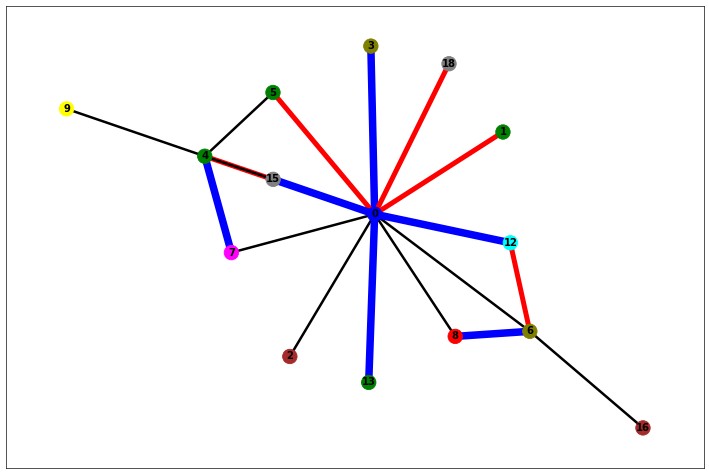

In [10]:
G = trainer[cls_idx].evaluate(threshold=0.5, show=True)

In [11]:
print(type(G))
print(G.adj)
print(G.nodes)
print(G.edges)

print('Nodes: ')
for v in list(G.nodes):
    print(G.nodes[v])

print('Edges: ')
for e in G.edges:
    print(G.edges[e])

<class 'networkx.classes.graph.Graph'>
{0: {1: {'label': 1}, 2: {'label': 0}, 3: {'label': 2}, 4: {'label': 1}, 5: {'label': 1}, 6: {'label': 0}, 7: {'label': 0}, 8: {'label': 0}, 12: {'label': 2}, 13: {'label': 2}, 15: {'label': 2}, 18: {'label': 1}}, 1: {0: {'label': 1}}, 2: {0: {'label': 0}}, 3: {0: {'label': 2}}, 4: {0: {'label': 1}, 5: {'label': 0}, 7: {'label': 2}, 9: {'label': 0}, 15: {'label': 0}}, 5: {0: {'label': 1}, 4: {'label': 0}}, 6: {0: {'label': 0}, 8: {'label': 2}, 12: {'label': 1}, 16: {'label': 0}}, 7: {0: {'label': 0}, 4: {'label': 2}}, 8: {0: {'label': 0}, 6: {'label': 2}}, 12: {0: {'label': 2}, 6: {'label': 1}}, 13: {0: {'label': 2}}, 15: {0: {'label': 2}, 4: {'label': 0}}, 18: {0: {'label': 1}}, 9: {4: {'label': 0}}, 16: {6: {'label': 0}}}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 12, 13, 15, 18, 9, 16]
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 12), (0, 13), (0, 15), (0, 18), (4, 5), (4, 7), (4, 9), (4, 15), (6, 8), (6, 12), (6, 16)]
Nodes: 
{'label'

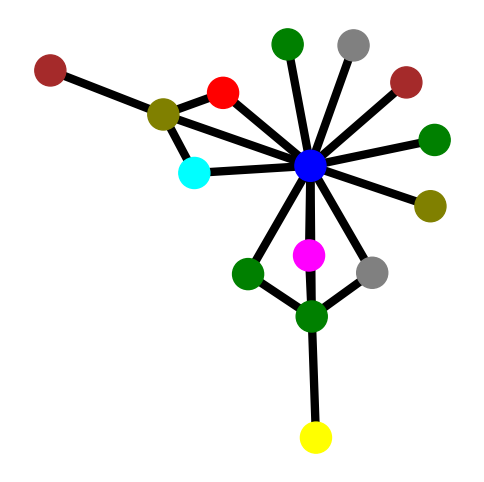

In [12]:
trainer[cls_idx].dataset.draw(G, ax=None)

# Non-Mutagen Class (Class 1)

In [13]:

cls_idx = 1
trainer[cls_idx] = Trainer(
    sampler=(s := GraphSampler(
        max_nodes=20,
        num_node_cls=len(dataset.NODE_CLS),
        num_edge_cls=len(dataset.EDGE_CLS),
        seed=global_seed,
        temperature=0.15,
        learn_node_feat=True,
        learn_edge_feat=True,
    )),
    discriminator=model,
    criterion=WeightedCriterion([
        dict(key="logits", criterion=ClassScoreCriterion(class_idx=cls_idx, mode='maximize'), weight=5),
        dict(key="embeds", criterion=EmbeddingCriterion(target_embedding=mean_embeds[cls_idx]), weight=10),
        dict(key="logits", criterion=MeanPenalty(), weight=0),
        dict(key="omega", criterion=NormPenalty(order=1), weight=4),
        dict(key="omega", criterion=NormPenalty(order=2), weight=4),
#         dict(key="xi", criterion=NormPenalty(order=1), weight=0),
#         dict(key="xi", criterion=NormPenalty(order=2), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=1), weight=0),
        # dict(key="eta", criterion=NormPenalty(order=2), weight=0),
        dict(key="theta_pairs", criterion=KLDivergencePenalty(binary=True), weight=5),
    ]),
    optimizer=(o := torch.optim.SGD(s.parameters(), lr=1)),
    scheduler=torch.optim.lr_scheduler.ExponentialLR(o, gamma=1),
    dataset=dataset,
    budget_penalty=BudgetPenalty(budget=25, order=1, beta=1),
    seed=global_seed,
    target_probs={cls_idx: (0.9, 1)},
    k_samples=16
)


In [14]:
trainer[cls_idx].train(1000)

  0%|          | 0/1000 [00:00<?, ?it/s]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  0%|          | 1/1000 [00:02<42:40,  2.56s/it, size=98.2, bpw=1.1, mutagen=-5.24, nonmutagen=5.88]

iteration=0, loss=4167.39, size=98.20231628417969, scores={'mutagen': -5.236053466796875, 'nonmutagen': 5.883206844329834}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  0%|          | 2/1000 [00:04<32:47,  1.97s/it, size=86.2, bpw=1.21, mutagen=-17.5, nonmutagen=22.6]

iteration=1, loss=37310.05, size=86.23039245605469, scores={'mutagen': -17.512813568115234, 'nonmutagen': 22.63287925720215}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  0%|          | 3/1000 [00:05<27:56,  1.68s/it, size=86.7, bpw=1.33, mutagen=-23.1, nonmutagen=28.4]

iteration=2, loss=34634.60, size=86.7312240600586, scores={'mutagen': -23.084318161010742, 'nonmutagen': 28.367128372192383}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  0%|          | 4/1000 [00:06<26:01,  1.57s/it, size=81.9, bpw=1.46, mutagen=-22.7, nonmutagen=27.8]

iteration=3, loss=31197.50, size=81.90564727783203, scores={'mutagen': -22.71500587463379, 'nonmutagen': 27.8120059967041}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  0%|          | 5/1000 [00:08<24:33,  1.48s/it, size=84.2, bpw=1.61, mutagen=-24.2, nonmutagen=29.6]

iteration=4, loss=31732.05, size=84.19367980957031, scores={'mutagen': -24.19839859008789, 'nonmutagen': 29.55243682861328}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  1%|          | 6/1000 [00:09<23:32,  1.42s/it, size=82.4, bpw=1.77, mutagen=-17.4, nonmutagen=23.6]

iteration=5, loss=28457.71, size=82.42666625976562, scores={'mutagen': -17.38904571533203, 'nonmutagen': 23.561717987060547}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  1%|          | 7/1000 [00:10<22:45,  1.38s/it, size=85.4, bpw=1.95, mutagen=-17.1, nonmutagen=23.5]

iteration=6, loss=31248.70, size=85.35093688964844, scores={'mutagen': -17.149639129638672, 'nonmutagen': 23.49370574951172}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  1%|          | 8/1000 [00:12<22:20,  1.35s/it, size=81.9, bpw=2.14, mutagen=-15.8, nonmutagen=21.4]

iteration=7, loss=30492.11, size=81.85595703125, scores={'mutagen': -15.762639045715332, 'nonmutagen': 21.402599334716797}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  1%|          | 9/1000 [00:13<23:11,  1.40s/it, size=81.1, bpw=2.36, mutagen=-17.6, nonmutagen=24.2]

iteration=8, loss=26067.12, size=81.09833526611328, scores={'mutagen': -17.552677154541016, 'nonmutagen': 24.24077606201172}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  1%|          | 10/1000 [00:14<22:39,  1.37s/it, size=79.3, bpw=2.59, mutagen=-16.1, nonmutagen=21.4]

iteration=9, loss=26609.23, size=79.2784652709961, scores={'mutagen': -16.11406707763672, 'nonmutagen': 21.43684196472168}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  1%|          | 11/1000 [00:16<24:09,  1.47s/it, size=76.8, bpw=2.85, mutagen=-14.6, nonmutagen=19.6]

iteration=10, loss=26933.61, size=76.80853271484375, scores={'mutagen': -14.604660034179688, 'nonmutagen': 19.61861801147461}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  1%|          | 12/1000 [00:18<24:02,  1.46s/it, size=75.3, bpw=3.14, mutagen=-12.6, nonmutagen=17.2]

iteration=11, loss=25776.23, size=75.2744140625, scores={'mutagen': -12.615665435791016, 'nonmutagen': 17.17873764038086}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  1%|▏         | 13/1000 [00:19<24:04,  1.46s/it, size=78, bpw=3.45, mutagen=-12.7, nonmutagen=17.8]  

iteration=12, loss=25418.84, size=78.0441665649414, scores={'mutagen': -12.68171501159668, 'nonmutagen': 17.753902435302734}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  1%|▏         | 14/1000 [00:20<23:17,  1.42s/it, size=80, bpw=3.8, mutagen=-13.2, nonmutagen=18.9] 

iteration=13, loss=25232.77, size=80.02525329589844, scores={'mutagen': -13.24966812133789, 'nonmutagen': 18.938636779785156}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▏         | 15/1000 [00:22<23:09,  1.41s/it, size=78.4, bpw=4.18, mutagen=-11.3, nonmutagen=16.3]

iteration=14, loss=24310.47, size=78.39485168457031, scores={'mutagen': -11.310291290283203, 'nonmutagen': 16.293134689331055}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  2%|▏         | 16/1000 [00:23<22:53,  1.40s/it, size=80.9, bpw=4.59, mutagen=-13.5, nonmutagen=18.9]

iteration=15, loss=25043.16, size=80.86831665039062, scores={'mutagen': -13.50490665435791, 'nonmutagen': 18.92237663269043}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▏         | 17/1000 [00:24<22:36,  1.38s/it, size=78.9, bpw=5.05, mutagen=-12.3, nonmutagen=17.5]

iteration=16, loss=23686.50, size=78.85981750488281, scores={'mutagen': -12.252787590026855, 'nonmutagen': 17.548954010009766}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  2%|▏         | 18/1000 [00:26<22:14,  1.36s/it, size=85.2, bpw=5.56, mutagen=-11.8, nonmutagen=17.6]

iteration=17, loss=20792.78, size=85.17668151855469, scores={'mutagen': -11.839707374572754, 'nonmutagen': 17.62090492248535}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▏         | 19/1000 [00:27<22:49,  1.40s/it, size=80.8, bpw=6.12, mutagen=-12.3, nonmutagen=17.2]

iteration=18, loss=19620.82, size=80.83583068847656, scores={'mutagen': -12.272747039794922, 'nonmutagen': 17.168975830078125}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  2%|▏         | 20/1000 [00:29<22:24,  1.37s/it, size=84.5, bpw=6.73, mutagen=-13, nonmutagen=18.5]  

iteration=19, loss=18980.89, size=84.53516387939453, scores={'mutagen': -13.0004243850708, 'nonmutagen': 18.548940658569336}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▏         | 21/1000 [00:30<22:05,  1.35s/it, size=78.8, bpw=7.4, mutagen=-13.3, nonmutagen=18.4]

iteration=20, loss=17829.10, size=78.79766082763672, scores={'mutagen': -13.335415840148926, 'nonmutagen': 18.43381118774414}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  2%|▏         | 22/1000 [00:31<21:49,  1.34s/it, size=81.8, bpw=8.14, mutagen=-12, nonmutagen=17.4] 

iteration=21, loss=17969.06, size=81.78964233398438, scores={'mutagen': -12.000142097473145, 'nonmutagen': 17.370311737060547}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▏         | 23/1000 [00:32<21:34,  1.33s/it, size=86.1, bpw=8.95, mutagen=-13, nonmutagen=18.3]

iteration=22, loss=16400.73, size=86.13615417480469, scores={'mutagen': -13.022368431091309, 'nonmutagen': 18.252859115600586}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  2%|▏         | 24/1000 [00:34<22:46,  1.40s/it, size=87.2, bpw=9.85, mutagen=-12.8, nonmutagen=18.2]

iteration=23, loss=16473.29, size=87.1557388305664, scores={'mutagen': -12.81696891784668, 'nonmutagen': 18.18456268310547}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  2%|▎         | 25/1000 [00:35<22:27,  1.38s/it, size=91.7, bpw=10.8, mutagen=-12.9, nonmutagen=18.3]

iteration=24, loss=17508.50, size=91.70750427246094, scores={'mutagen': -12.883234024047852, 'nonmutagen': 18.264198303222656}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  3%|▎         | 26/1000 [00:37<22:21,  1.38s/it, size=91.5, bpw=11.9, mutagen=-14.1, nonmutagen=19.8]

iteration=25, loss=19375.81, size=91.50590515136719, scores={'mutagen': -14.10994815826416, 'nonmutagen': 19.75777816772461}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  3%|▎         | 27/1000 [00:38<24:04,  1.48s/it, size=91.6, bpw=13.1, mutagen=-15.8, nonmutagen=22.6]

iteration=26, loss=19039.42, size=91.56958770751953, scores={'mutagen': -15.845024108886719, 'nonmutagen': 22.628067016601562}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  3%|▎         | 28/1000 [00:40<24:15,  1.50s/it, size=84.3, bpw=14.4, mutagen=-16.6, nonmutagen=23.3]

iteration=27, loss=18654.94, size=84.33868408203125, scores={'mutagen': -16.56303596496582, 'nonmutagen': 23.313053131103516}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  3%|▎         | 29/1000 [00:41<23:15,  1.44s/it, size=81.3, bpw=15.9, mutagen=-16, nonmutagen=22.7]  

iteration=28, loss=18456.31, size=81.25322723388672, scores={'mutagen': -15.965947151184082, 'nonmutagen': 22.70876121520996}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  3%|▎         | 30/1000 [00:43<22:29,  1.39s/it, size=80.1, bpw=17.4, mutagen=-15.1, nonmutagen=21.7]

iteration=29, loss=17888.94, size=80.1073226928711, scores={'mutagen': -15.052886962890625, 'nonmutagen': 21.704917907714844}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  3%|▎         | 31/1000 [00:44<21:59,  1.36s/it, size=82.3, bpw=19.2, mutagen=-15.3, nonmutagen=22.1]

iteration=30, loss=18075.01, size=82.29987335205078, scores={'mutagen': -15.333733558654785, 'nonmutagen': 22.099048614501953}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  3%|▎         | 32/1000 [00:45<21:41,  1.34s/it, size=86.1, bpw=21.1, mutagen=-14.6, nonmutagen=21.2]

iteration=31, loss=17436.02, size=86.10345458984375, scores={'mutagen': -14.604645729064941, 'nonmutagen': 21.163530349731445}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  3%|▎         | 33/1000 [00:46<21:21,  1.32s/it, size=82.9, bpw=23.2, mutagen=-15.8, nonmutagen=22.3]

iteration=32, loss=16376.71, size=82.89583587646484, scores={'mutagen': -15.754380226135254, 'nonmutagen': 22.34267807006836}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  3%|▎         | 34/1000 [00:48<20:47,  1.29s/it, size=80.7, bpw=25.5, mutagen=-15.9, nonmutagen=22.6]

iteration=33, loss=16164.21, size=80.67547607421875, scores={'mutagen': -15.856640815734863, 'nonmutagen': 22.638694763183594}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▎         | 35/1000 [00:49<20:46,  1.29s/it, size=83.3, bpw=28.1, mutagen=-15.2, nonmutagen=22]  

iteration=34, loss=16533.19, size=83.33102416992188, scores={'mutagen': -15.249171257019043, 'nonmutagen': 21.975082397460938}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  4%|▎         | 36/1000 [00:50<20:43,  1.29s/it, size=83, bpw=30.9, mutagen=-15, nonmutagen=21.8]  

iteration=35, loss=17324.68, size=83.03479766845703, scores={'mutagen': -15.004530906677246, 'nonmutagen': 21.815736770629883}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▎         | 37/1000 [00:52<21:24,  1.33s/it, size=78.3, bpw=34, mutagen=-15, nonmutagen=21.7]

iteration=36, loss=16403.23, size=78.32406616210938, scores={'mutagen': -15.026297569274902, 'nonmutagen': 21.67640495300293}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  4%|▍         | 38/1000 [00:53<21:17,  1.33s/it, size=79.8, bpw=37.4, mutagen=-14.2, nonmutagen=20.6]

iteration=37, loss=16039.34, size=79.79328155517578, scores={'mutagen': -14.19061279296875, 'nonmutagen': 20.612102508544922}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▍         | 39/1000 [00:54<21:01,  1.31s/it, size=81.9, bpw=41.1, mutagen=-15.3, nonmutagen=21.8]

iteration=38, loss=17105.39, size=81.88031768798828, scores={'mutagen': -15.27749252319336, 'nonmutagen': 21.84648895263672}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  4%|▍         | 40/1000 [00:55<20:34,  1.29s/it, size=82.5, bpw=45.3, mutagen=-13.9, nonmutagen=20.3]

iteration=39, loss=18265.21, size=82.46366882324219, scores={'mutagen': -13.854453086853027, 'nonmutagen': 20.328149795532227}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▍         | 41/1000 [00:57<20:48,  1.30s/it, size=83, bpw=49.8, mutagen=-14.8, nonmutagen=21.4]  

iteration=40, loss=19054.96, size=82.97453308105469, scores={'mutagen': -14.76526927947998, 'nonmutagen': 21.448476791381836}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  4%|▍         | 42/1000 [00:58<21:45,  1.36s/it, size=77.1, bpw=54.8, mutagen=-14.5, nonmutagen=21.1]

iteration=41, loss=19007.79, size=77.11572265625, scores={'mutagen': -14.485431671142578, 'nonmutagen': 21.05225944519043}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▍         | 43/1000 [01:00<21:28,  1.35s/it, size=81.1, bpw=60.2, mutagen=-14.5, nonmutagen=21]  

iteration=42, loss=18312.87, size=81.05191040039062, scores={'mutagen': -14.454354286193848, 'nonmutagen': 20.98666763305664}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  4%|▍         | 44/1000 [01:01<21:45,  1.37s/it, size=79.6, bpw=66.3, mutagen=-14.2, nonmutagen=20.9]

iteration=43, loss=18217.32, size=79.5882339477539, scores={'mutagen': -14.237813949584961, 'nonmutagen': 20.88959312438965}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  4%|▍         | 45/1000 [01:02<21:29,  1.35s/it, size=73.5, bpw=72.9, mutagen=-14.4, nonmutagen=20.8]

iteration=44, loss=18326.75, size=73.47675323486328, scores={'mutagen': -14.399819374084473, 'nonmutagen': 20.785442352294922}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  5%|▍         | 46/1000 [01:04<21:13,  1.33s/it, size=71.8, bpw=80.2, mutagen=-14.3, nonmutagen=20.6]

iteration=45, loss=18931.97, size=71.8319091796875, scores={'mutagen': -14.250129699707031, 'nonmutagen': 20.5989990234375}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  5%|▍         | 47/1000 [01:05<20:55,  1.32s/it, size=71, bpw=88.2, mutagen=-14.7, nonmutagen=21.3]  

iteration=46, loss=20684.01, size=70.98959350585938, scores={'mutagen': -14.725729942321777, 'nonmutagen': 21.295438766479492}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  5%|▍         | 48/1000 [01:06<20:47,  1.31s/it, size=73.5, bpw=97, mutagen=-14.6, nonmutagen=20.8]

iteration=47, loss=23763.50, size=73.45545959472656, scores={'mutagen': -14.554526329040527, 'nonmutagen': 20.84522819519043}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  5%|▍         | 49/1000 [01:07<20:32,  1.30s/it, size=73.1, bpw=107, mutagen=-13.9, nonmutagen=20.5]

iteration=48, loss=24124.24, size=73.13658142089844, scores={'mutagen': -13.880084037780762, 'nonmutagen': 20.451236724853516}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  5%|▌         | 50/1000 [01:09<20:20,  1.28s/it, size=72.1, bpw=117, mutagen=-14.1, nonmutagen=20.6]

iteration=49, loss=24722.42, size=72.07174682617188, scores={'mutagen': -14.050602912902832, 'nonmutagen': 20.605825424194336}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  5%|▌         | 51/1000 [01:10<20:12,  1.28s/it, size=70.6, bpw=129, mutagen=-14.4, nonmutagen=20.9]

iteration=50, loss=24048.53, size=70.56509399414062, scores={'mutagen': -14.445070266723633, 'nonmutagen': 20.920196533203125}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  5%|▌         | 52/1000 [01:11<20:19,  1.29s/it, size=65.5, bpw=142, mutagen=-14, nonmutagen=20.5]  

iteration=51, loss=24028.02, size=65.49063110351562, scores={'mutagen': -13.959226608276367, 'nonmutagen': 20.487079620361328}


  5%|▌         | 53/1000 [01:13<20:21,  1.29s/it, size=69.9, bpw=156, mutagen=-13.9, nonmutagen=20.2]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>
iteration=52, loss=25553.21, size=69.86709594726562, scores={'mutagen': -13.869832038879395, 'nonmutagen': 20.24794578552246}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  5%|▌         | 54/1000 [01:14<20:44,  1.32s/it, size=66.9, bpw=172, mutagen=-13.2, nonmutagen=19.6]

iteration=53, loss=25229.13, size=66.89688873291016, scores={'mutagen': -13.2188720703125, 'nonmutagen': 19.55933380126953}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▌         | 55/1000 [01:15<20:53,  1.33s/it, size=63.1, bpw=189, mutagen=-13, nonmutagen=19.2]  

iteration=54, loss=25131.33, size=63.148067474365234, scores={'mutagen': -13.03243637084961, 'nonmutagen': 19.236202239990234}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  6%|▌         | 56/1000 [01:17<20:53,  1.33s/it, size=62.4, bpw=208, mutagen=-13.3, nonmutagen=19.4]

iteration=55, loss=25733.77, size=62.39060974121094, scores={'mutagen': -13.332658767700195, 'nonmutagen': 19.375343322753906}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▌         | 57/1000 [01:18<20:57,  1.33s/it, size=60.6, bpw=229, mutagen=-13.3, nonmutagen=19.5]

iteration=56, loss=26155.95, size=60.5953369140625, scores={'mutagen': -13.304018020629883, 'nonmutagen': 19.544830322265625}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  6%|▌         | 58/1000 [01:19<20:37,  1.31s/it, size=58.2, bpw=252, mutagen=-12.9, nonmutagen=18.9]

iteration=57, loss=25297.83, size=58.18589401245117, scores={'mutagen': -12.895194053649902, 'nonmutagen': 18.88580894470215}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▌         | 59/1000 [01:21<21:15,  1.36s/it, size=59.2, bpw=277, mutagen=-13.2, nonmutagen=19.2]

iteration=58, loss=26450.62, size=59.165077209472656, scores={'mutagen': -13.171710968017578, 'nonmutagen': 19.159170150756836}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  6%|▌         | 60/1000 [01:22<21:02,  1.34s/it, size=56.6, bpw=304, mutagen=-13.1, nonmutagen=19.1]

iteration=59, loss=25916.65, size=56.55045700073242, scores={'mutagen': -13.107624053955078, 'nonmutagen': 19.124645233154297}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▌         | 61/1000 [01:23<21:08,  1.35s/it, size=53.6, bpw=335, mutagen=-12.9, nonmutagen=18.9]

iteration=60, loss=27098.88, size=53.56731033325195, scores={'mutagen': -12.875197410583496, 'nonmutagen': 18.914155960083008}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  6%|▌         | 62/1000 [01:25<20:52,  1.34s/it, size=51.8, bpw=368, mutagen=-12.4, nonmutagen=18.5]

iteration=61, loss=27621.21, size=51.83335876464844, scores={'mutagen': -12.362936973571777, 'nonmutagen': 18.476131439208984}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▋         | 63/1000 [01:26<20:57,  1.34s/it, size=45.5, bpw=405, mutagen=-12.2, nonmutagen=18.1]

iteration=62, loss=28935.94, size=45.549800872802734, scores={'mutagen': -12.23964786529541, 'nonmutagen': 18.061420440673828}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  6%|▋         | 64/1000 [01:27<21:09,  1.36s/it, size=46.9, bpw=446, mutagen=-12.9, nonmutagen=18.9]

iteration=63, loss=29790.38, size=46.88182830810547, scores={'mutagen': -12.938815116882324, 'nonmutagen': 18.92157745361328}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  6%|▋         | 65/1000 [01:29<21:15,  1.36s/it, size=42.7, bpw=490, mutagen=-13.6, nonmutagen=20]  

iteration=64, loss=31681.07, size=42.688106536865234, scores={'mutagen': -13.609749794006348, 'nonmutagen': 19.99473762512207}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  7%|▋         | 66/1000 [01:30<21:19,  1.37s/it, size=34.9, bpw=539, mutagen=-12.8, nonmutagen=19]

iteration=65, loss=30924.64, size=34.937286376953125, scores={'mutagen': -12.786158561706543, 'nonmutagen': 19.039487838745117}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  7%|▋         | 67/1000 [01:32<21:02,  1.35s/it, size=28.3, bpw=593, mutagen=-10.9, nonmutagen=16.3]

iteration=66, loss=27624.15, size=28.333263397216797, scores={'mutagen': -10.946516990661621, 'nonmutagen': 16.272342681884766}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  7%|▋         | 68/1000 [01:33<21:23,  1.38s/it, size=25.2, bpw=653, mutagen=-8.39, nonmutagen=12.5]

iteration=67, loss=26240.79, size=25.15574073791504, scores={'mutagen': -8.389800071716309, 'nonmutagen': 12.470641136169434}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>


  7%|▋         | 69/1000 [01:34<21:29,  1.39s/it, size=28.8, bpw=718, mutagen=-8.22, nonmutagen=12.2]

iteration=68, loss=23675.23, size=28.8275203704834, scores={'mutagen': -8.221564292907715, 'nonmutagen': 12.23462963104248}

Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cac23e0>


  7%|▋         | 70/1000 [01:36<21:08,  1.36s/it, size=23.5, bpw=790, mutagen=-9.51, nonmutagen=14.6]

iteration=69, loss=24729.64, size=23.511730194091797, scores={'mutagen': -9.51364803314209, 'nonmutagen': 14.628276824951172}


  7%|▋         | 70/1000 [01:37<21:33,  1.39s/it, size=23.5, bpw=790, mutagen=-9.51, nonmutagen=14.6]


Prediction of the sample:  <generator object Trainer.train.<locals>.<genexpr> at 0x7f715cc07f10>
Expected number of edges of sample: 23.511730194091797; Budget: 25
Current explanation has high prediction probability and low expected maximum number of edges. Hence, it is a good explanation.
Breaking from train loop!



True

n=14 m=23
logits=[-10.114331245422363, 14.800601959228516]
probs=[1.512106585777051e-11, 1.0]
Graph Viz info: 
No of nodes:  14
Nodes:  [(0, {'label': 'H', 'color': 'yellow'}), (2, {'label': 'S', 'color': 'brown'}), (4, {'label': 'Br', 'color': 'pink'}), (5, {'label': 'I', 'color': 'gray'}), (6, {'label': 'Cl', 'color': 'green'}), (10, {'label': 'S', 'color': 'brown'}), (11, {'label': 'Br', 'color': 'pink'}), (12, {'label': 'N', 'color': 'orange'}), (13, {'label': 'N', 'color': 'orange'}), (14, {'label': 'H', 'color': 'yellow'}), (17, {'label': 'Br', 'color': 'pink'}), (18, {'label': 'I', 'color': 'gray'}), (7, {'label': 'K', 'color': 'magenta'}), (15, {'label': 'I', 'color': 'gray'})]
No of edges:  23
Edges:  [(0, 2, {'label': 'single', 'color': 'black', 'width': 3}), (0, 4, {'label': 'double', 'color': 'red', 'width': 6}), (0, 5, {'label': 'double', 'color': 'red', 'width': 6}), (0, 6, {'label': 'single', 'color': 'black', 'width': 3}), (0, 10, {'label': 'single', 'color': 'black', '

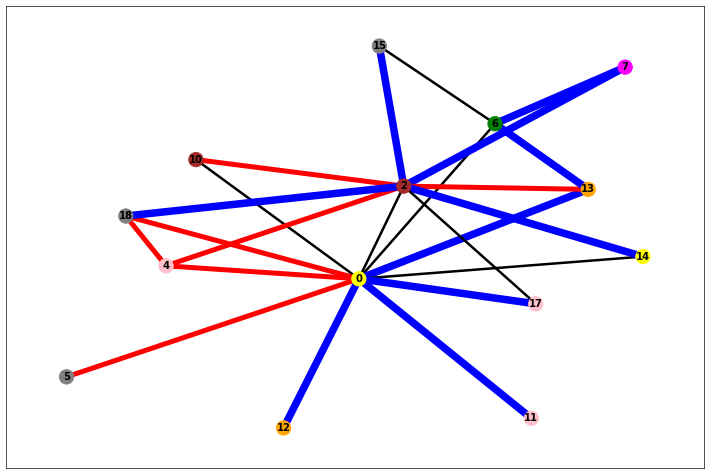

In [15]:
G = trainer[cls_idx].evaluate(threshold=0.5, show=True)

In [16]:
print(type(G))
print(G.adj)
print(G.nodes)
print(G.edges)

print('Nodes: ')
for v in list(G.nodes):
    print(G.nodes[v])
    
print('Edges: ')
for e in G.edges:
    print(G.edges[e])

<class 'networkx.classes.graph.Graph'>
{0: {2: {'label': 0}, 4: {'label': 1}, 5: {'label': 1}, 6: {'label': 0}, 10: {'label': 0}, 11: {'label': 2}, 12: {'label': 2}, 13: {'label': 2}, 14: {'label': 0}, 17: {'label': 2}, 18: {'label': 1}}, 2: {0: {'label': 0}, 4: {'label': 1}, 7: {'label': 2}, 10: {'label': 1}, 13: {'label': 1}, 14: {'label': 2}, 15: {'label': 2}, 17: {'label': 0}, 18: {'label': 2}}, 4: {0: {'label': 1}, 2: {'label': 1}, 18: {'label': 1}}, 5: {0: {'label': 1}}, 6: {0: {'label': 0}, 7: {'label': 2}, 13: {'label': 2}, 15: {'label': 0}}, 10: {0: {'label': 0}, 2: {'label': 1}}, 11: {0: {'label': 2}}, 12: {0: {'label': 2}}, 13: {0: {'label': 2}, 2: {'label': 1}, 6: {'label': 2}}, 14: {0: {'label': 0}, 2: {'label': 2}}, 17: {0: {'label': 2}, 2: {'label': 0}}, 18: {0: {'label': 1}, 2: {'label': 2}, 4: {'label': 1}}, 7: {2: {'label': 2}, 6: {'label': 2}}, 15: {2: {'label': 2}, 6: {'label': 0}}}
[0, 2, 4, 5, 6, 10, 11, 12, 13, 14, 17, 18, 7, 15]
[(0, 2), (0, 4), (0, 5), (0, 6), 

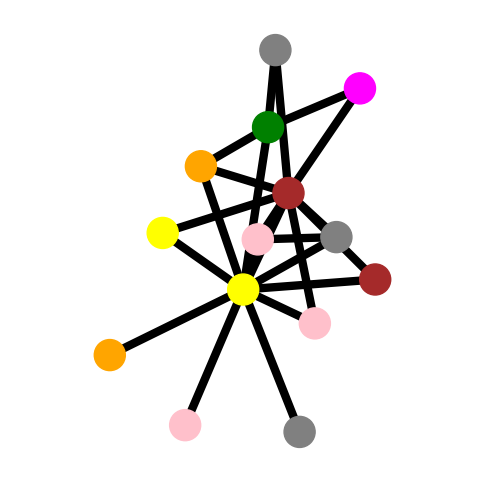

In [17]:
trainer[cls_idx].dataset.draw(G, ax=None)